<a href="https://colab.research.google.com/github/fromvelarde/fromvelarde/blob/main/Modelo_epidemiol%C3%B3gico_de_SARS_CoV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo epidemiológico de SARS-CoV-2

## Suposiciones


1.   Tomaremos que la población inicial es de 100,000 ciudadanos completamente sanos, en el día 0.

2.   Una persona solamente puede estar en alguno de los siguientes 5 estados:




*   Sano
*   Enfermo leve
*   Enfermo grave
*   Recuperado
*   Fallecido












3.   Asociado a los 5 estados de la exposición a SARS-CoV-2 podemos obtener las siguientes probabilidades de transición:

$s_l$, la probabilidad de pasar de estar sano a tener síntomas leves,

$l_g$, la probabilidad de pasar de tener síntomas leves a graves,

$l_r$, la probabilidad de pasar de tener síntomas leves a recuperarse,

$g_r$, la probabilidad de pasar de tener síntomas graves a recuperarse y

$g_f$, la probabilidad de pasar de tener síntomas graves, a fallecer.



Para cada día $n$, consideremos el vector:

$ X(n)=(s(n),l(n),g(n),r(n),f(n)) $




que corresponde a los individuos sanos, los enfermos leves, enfermos graves, recuperados y fallecidos al día $n$
.


Por ejemplo al día 0 todos los individuos están sanos, así que $X(0)=(1000000,0,0,0,0)$

Para la evolución entre los distintos estados de Markov, se realizan las siguientes suposiciones:

Paso de un estado a otro:

* Alguien solo puede fallecer si se encuentra enfermo grave.
* Si alguien es enfermo grave, tiene $g_f$ probabilidad de pasar a ser fallecido, $g_r$ de recuperarse y por lo tanto $(1-g_r-g_f)$ de quedarse enfermo grave
*La enfermedad se contagia de persona a persona, y de un día a otro una persona tiene probabilidad
 de pasar de estar sana a tener síntomas leves.
*No se puede pasar directamente a tener síntomas graves, recuperarse o morir. De modo que se queda sana de un día a otro con probabilidad $(1-s_l)$
*Si una persona tiene síntomas leves, tiene probabilidad $l_g$ de pasar a tener síntomas graves y $l_r$ de pasar a recuperarse. Por lo tanto, tiene probabilidad $(1-l_g-l_r)$ de quedarse con síntomas leves
*Una persona que se recupera desarrolla inmunidad a la enfermedad, por lo que se queda en estado de recuperado.
*Una persona que fallece, se queda en ese estado.

Con estos números y suposiciones, podemos entender, en valor esperado, cómo será el vector de población.

$X(n+1)=(s(n+1),l(n+1),g(n+1),r(n+1),f(n+1))$

Si sabemos como es el vector

$X(n)=(s(n), l(n), g(n), r(n), f(n))$

Por ejemplo, podemos esperar que la cantidad de recuperados al dia $n+1$ sea:

$r(n+1)=l_r*l(n)+g_r*g(n)+1*r(n)$

pues de los síntomas leves del día $n$ habrá una proporción $l_r$ de ellos que se recuperen, de los graves del día $n$ habrá una proporción $g_r$ de ellos que se recuperen, y todos los recuperados del día $n$ se quedan recuperados.

De esta forma, obtenemos el siguiente sistema de ecuaciones de lo que podemos esperar:



1. $s(n+1)=(1-s_l) x s(n)$

2. $l(n+1)= s_l x s(n) + (1-l_r-l_g) x l(n)$

3. $g(n+1)=l_g x l(n) + (1-gr-gf) x g(n)$

4. $r(n+1)=l_r x l(n) + g_r x g(n) +1 x r(n)$

5. $f(n+1)=g_f x g(n) + 1 x f(n)$


Este sistema de ecuaciones se puede escribir de una forma mucho más compacta. Si definimos la matriz:

\begin{equation}
\begin{pmatrix}
1-s_l & 0 & 0 & 0 & 0\\
0 & 1-l_r-l_g & 0 & 0 & 0\\
0 & l_g & 1-g_r-g_f & 0 & 0\\
0 & l_r & g_r & 1 & 0\\
0 & 0 & g_f & 0 & 1\\
\end{pmatrix}
\end{equation}

las ecuaciones anteriores se pueden abreviar simplemente a:

$X(n+1)=AX(n)$

De esta forma, si queremos entender qué esperar del día $n$, basta hacer la multiplicación matricial:

$X(n)=A^nX(0)$

# Cadena de Markov

Se tienen los siguientes valores para los parámetros del modelo:
$s_l=0.20, l_g=0.15, l_r=0.25, g_r=0.15 y g_f=0.15$

# Generaremos un algoritmo que retorne el estado de la poblacion al dia $n$.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#creamos las variables con sus probabilidades
sl = 0.20
lg = 0.15
lr = 0.25
gr = 0.15
gf = 0.15

#Creamos el vector población de dos dimenciones

x = np.array([[100000], [0], [0], [0], [0]])
A = np.array([[1 - sl, 0, 0, 0, 0], [sl, 1 - lr - lg, 0, 0, 0], [0, lg, 1 - gr - gf, 0, 0], [0, lr, gr, 1, 0],
             [0, 0, gf, 0, 1]])

Visualicemos x y A.

In [16]:
x

array([[100000],
       [     0],
       [     0],
       [     0],
       [     0]])

In [17]:
A

array([[0.8 , 0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  , 0.  ],
       [0.  , 0.15, 0.7 , 0.  , 0.  ],
       [0.  , 0.25, 0.15, 1.  , 0.  ],
       [0.  , 0.  , 0.15, 0.  , 1.  ]])

In [20]:
def vector_poblacion(dias):
    sl = 0.20
    lg = 0.15
    lr = 0.25
    gr = 0.15
    gf = 0.15

    x = np.array([[100000], [0], [0], [0], [0]])
    A = np.array([[1 - sl, 0, 0, 0, 0], [sl, 1 - lr - lg, 0, 0, 0], [0, lg, 1 - gr - gf, 0, 0], [0, lr, gr, 1, 0],
                 [0, 0, gf, 0, 1]])


    #creación de listas de los estados
    sanos = [100000]
    leves = [0]
    graves = [0]
    recuperados = [0]
    fallecidos = [0]

    for i in range (1, dias + 1): # Dias+1 porque el segundo argumento de range no se considera (1-s)
        x = np.dot(A, x) #producto de la Matriz A por el vector x
        poblacion = [int(elem) for elem in x]
        sanos.append(poblacion[0]) #indexamos
        leves.append(poblacion[1])
        graves.append(poblacion[2])
        recuperados.append(poblacion[3])
        fallecidos.append(poblacion[4])

#Gráfica
    plt.figure()
    plt.plot(sanos, c='green')
    plt.plot(leves, c='orange')
    plt.plot(graves, c='red')
    plt.plot(recuperados, c='blue')
    plt.plot(fallecidos, c='gray')
    plt.legend(['sanos', 'leves', 'graves', 'recuperados', 'fallecidos'])
    plt.xlabel('dias')
    plt.ylabel('numero de personas')
    plt.title(f'N = {dias}')

    #retorna la lista de todos los estados
    return [int(elem) for elem in x]

[10737, 10132, 8538, 60023, 10567]

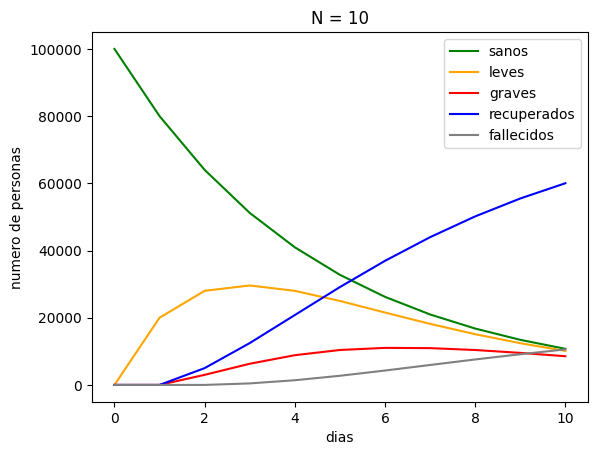

In [21]:
vector_poblacion(10)

[123, 123, 178, 80959, 18614]

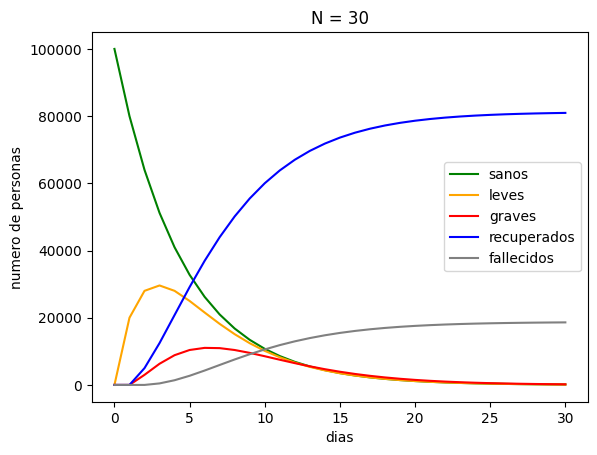

In [22]:
vector_poblacion(30)

[1, 1, 2, 81246, 18748]

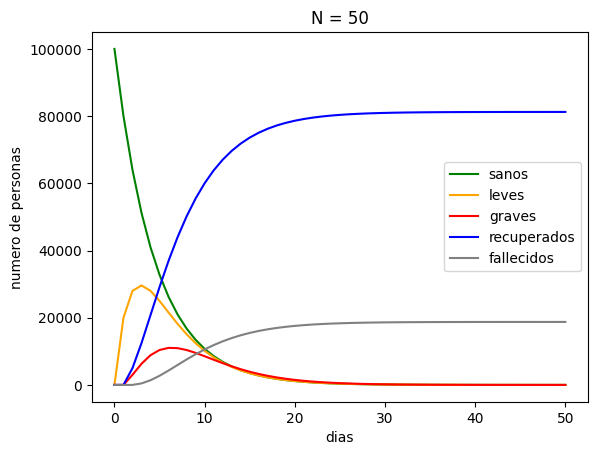

In [23]:
vector_poblacion(50)